Importing Required Libraries 

This cell imports the necessary libraries for data analysis and visualization, including pandas, numpy, matplotlib.pyplot, and seaborn. It also imports the warnings module to suppress any warning messages that may occur during the execution of the code. The line `warnings.filterwarnings('ignore')` ensures that warnings are not displayed in the output.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading and Inspecting the Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Renaming Column Names

In [3]:

df = df.rename(columns={'Annual Income (k$)':'Annual Income',
                   'Spending Score (1-100)':'Spending Score'})


Overview of DataFrame Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


 Descriptive Statistics of the DataFrame

In [5]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Scatter Plot of Annual Income vs. Spending Score

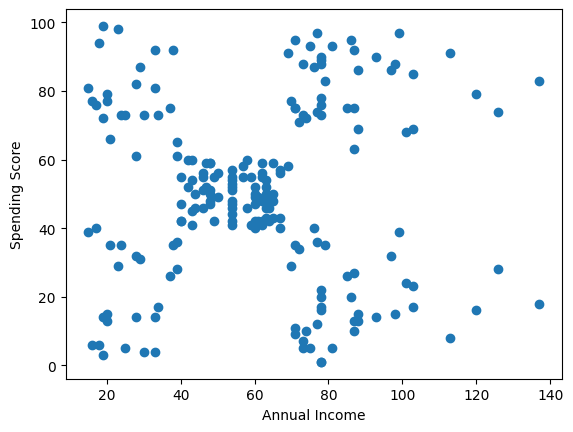

In [6]:
x = df.iloc[:,[3,4]].values
plt.scatter(x=x[:,0],y=x[:,1])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

Distribution Plots of Annual Income and Age

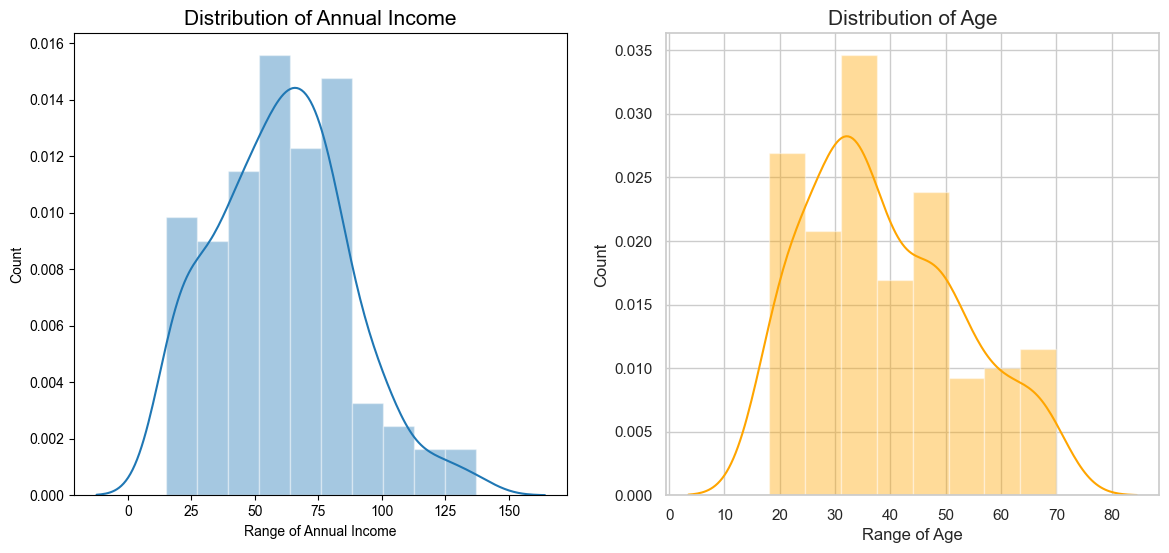

In [7]:
plt.rcParams['figure.figsize'] = (14, 6)

# Creating the first subplot for Annual Income distribution
plt.subplot(1, 2, 1)
sns.set(style='whitegrid')
sns.distplot(df['Annual Income'])
plt.title('Distribution of Annual Income', fontsize=15)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

# Creating the second subplot for Age distribution
plt.subplot(1, 2, 2)
sns.set(style='whitegrid')
sns.distplot(df['Age'], color='orange')
plt.title('Distribution of Age', fontsize=15)
plt.xlabel('Range of Age')
plt.ylabel('Count')

plt.show()


Pie Chart of Gender Distribution

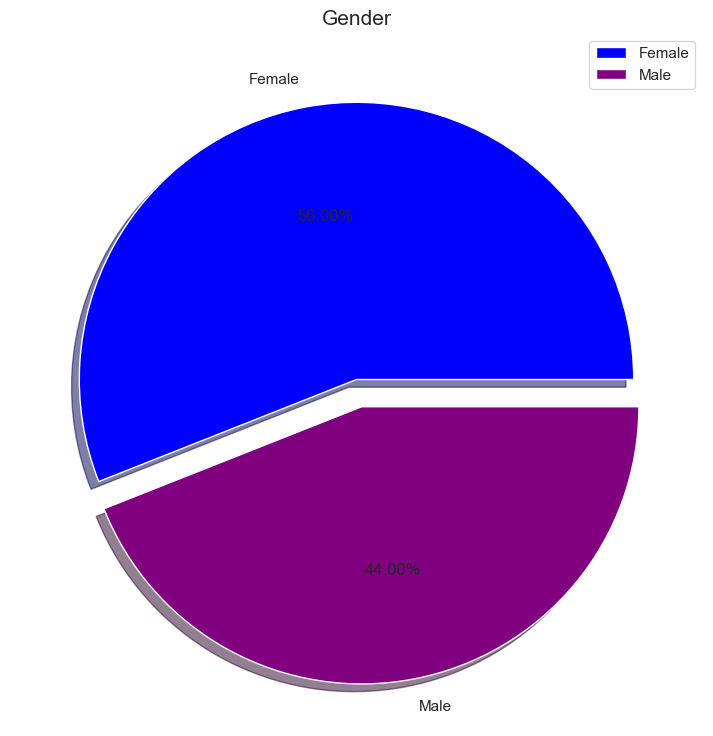

In [8]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['blue', 'purple']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)

# Creating a pie chart for gender distribution
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')

plt.title('Gender', fontsize=15)
plt.axis('off')
plt.legend()
plt.show()


Pairplot for Data Visualization

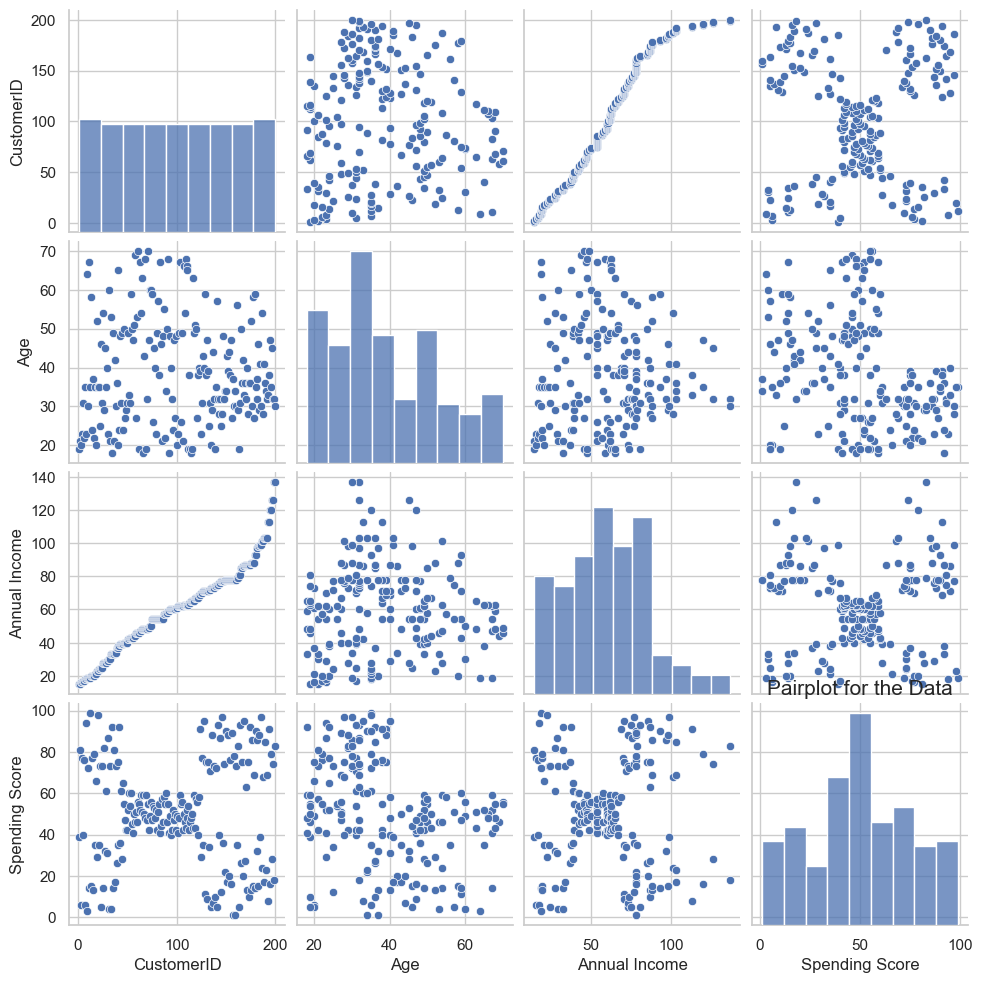

In [9]:
sns.pairplot(df,)
plt.title('Pairplot for the Data', fontsize = 15)
plt.show()

Heatmap of Correlation Coefficients: Exploring Relationships in the Data

Text(0.5, 1.0, 'Correlation Factors')

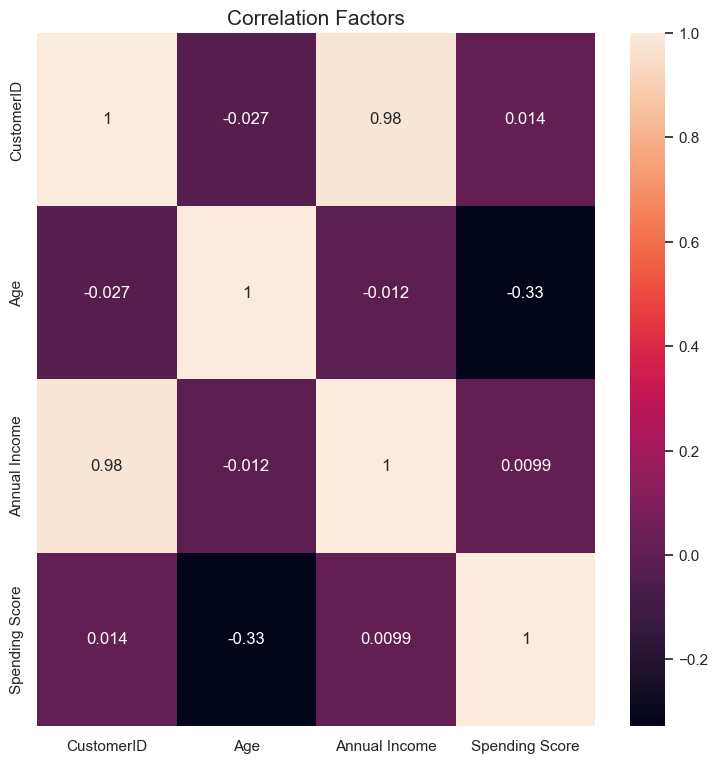

In [10]:
# Correlation coeffecients heatmap
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors', size='15')

Exploring Optimal Number of Clusters: The Elbow Method

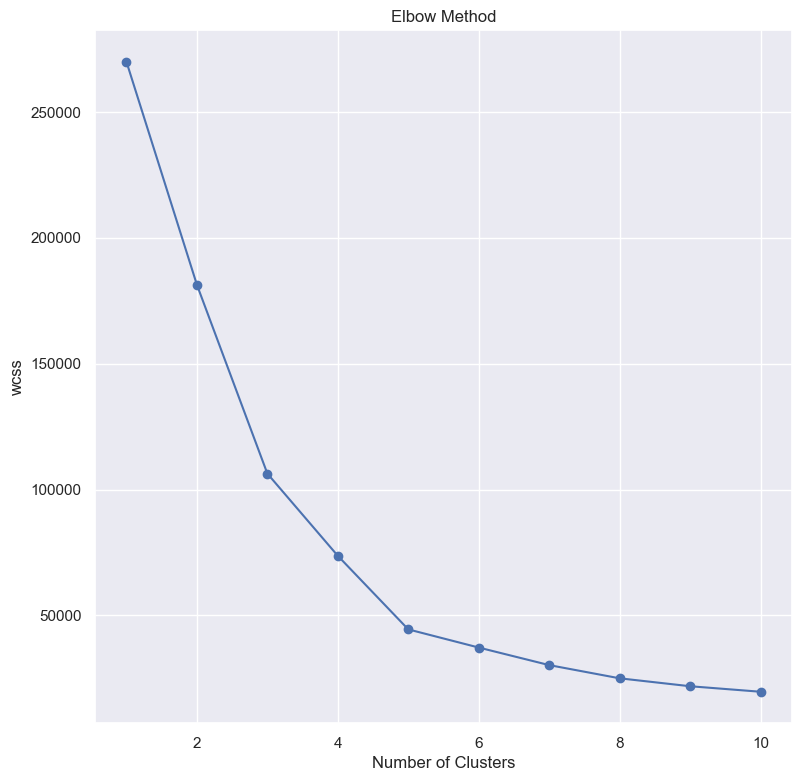

In [11]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    model = KMeans(n_clusters=i, init="k-means++",n_init=10, random_state=42)
    model.fit(x)
    wcss.append(model.inertia_)
# Plotting the elbow curve
sns.set()
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.title("Elbow Method")
plt.show()

Clustering Customers into 5 Groups based on Annual Income and Spending Score

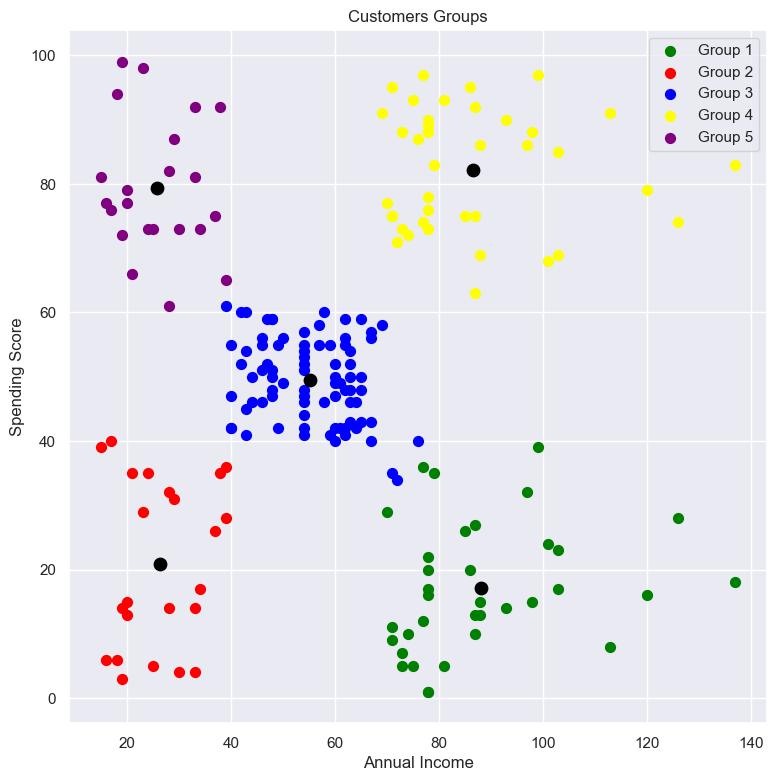

In [12]:


model = KMeans(n_clusters=5,n_init=10)
y = model.fit_predict(x)

plt.scatter(x[y==0,0],x[y==0,1],s=50,c="green",label="Group 1")
plt.scatter(x[y==1,0],x[y==1,1],s=50,c="red",label="Group 2")
plt.scatter(x[y==2,0],x[y==2,1],s=50,c="blue",label="Group 3")
plt.scatter(x[y==3,0],x[y==3,1],s=50,c="yellow",label="Group 4")
plt.scatter(x[y==4,0],x[y==4,1],s=50,c="purple",label="Group 5")

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=80, c="black")

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customers Groups")
plt.legend()
plt.show()

Deploying the Clustering Model for User Input

This code allows the user to enter their annual income and spending score, and then predicts the group to which they belong based on the pre-trained clustering model.

In [13]:
# deploy the model with user input

def test(x):
    y = model.predict(x)
    if y == 0:
        return "Group 1"
    elif y == 1:
        return "Group 2"
    elif y == 2:
        return "Group 3"
    elif y == 3:
        return "Group 3"
    else:
        return "Group 5"
try:

    Annual_Income = int(input("Enter Annual Income : "))
    Spending_Score = int(input("Enter Spending Score : "))
    user_input = np.array([[Annual_Income, Spending_Score]])
except ValueError:
            print("Invalid input. Please enter integer values")

predicted_group = test(user_input)
print(f"The Annual Income = {Annual_Income} , Spending Score = {Spending_Score} belongs to {predicted_group}")

The Annual Income = 50 , Spending Score = 96 belongs to Group 5
